<a href="https://colab.research.google.com/github/Ravineesh2005/Deep-Learning/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/D_L/dataset/cats_dogs.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input


In [16]:
from keras.layers import BatchNormalization,Dropout

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cats_dogs/train',
    labels = 'inferred',
     label_mode='int',
     class_names=None,
     color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True)


Found 8000 files belonging to 2 classes.


In [7]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cats_dogs/test',
    labels = 'inferred',
     label_mode='int',
     class_names=None,
     color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True)


Found 2000 files belonging to 2 classes.


In [8]:
#Normalize transform fixels values btw 0 to 1

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [17]:
# creating CNN model by ravi

model = Sequential([

  Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape =(256,256,3)),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2),strides =2,padding ='valid'),

  Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2),strides =2,padding ='valid'),

  Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2),strides =2,padding ='valid'),

  Flatten(),

  Dense(128,activation='relu'),
  Dropout(0.1),
  Dense(64,activation='relu'),
  Dropout(0.1),
  Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])

In [21]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.9459 - loss: 0.1382 - val_accuracy: 0.7605 - val_loss: 0.7468
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9587 - loss: 0.1058 - val_accuracy: 0.7440 - val_loss: 1.0858
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.9663 - loss: 0.0865 - val_accuracy: 0.7705 - val_loss: 0.7841
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 118ms/step - accuracy: 0.9777 - loss: 0.0642 - val_accuracy: 0.7160 - val_loss: 1.6446
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9724 - loss: 0.0764 - val_accuracy: 0.7355 - val_loss: 1.1819
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9825 - loss: 0.0507 - val_accuracy: 0.7650 - val_loss: 1.1209
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9858 - loss: 0.0440 - val_accuracy: 0.7885 - val_loss: 1.1455
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9840 - loss: 0.0534 

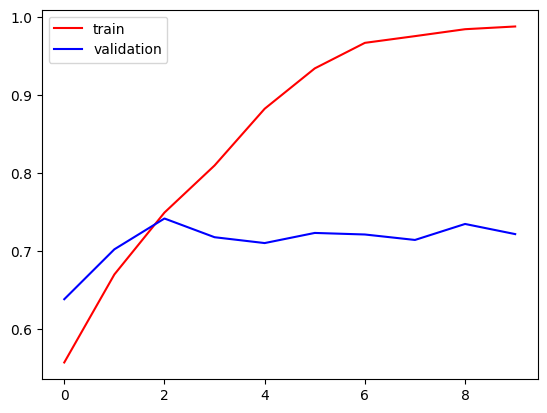

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

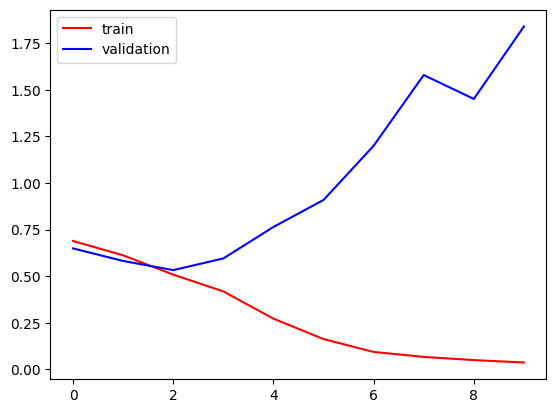

In [14]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [15]:
# way to reduced overfitting

# 1. Add more data
# 2. Data Agumantation
# 3. l1/L2 Regularization
# 4. Dropout
# 5. Batch Norm
# 6. Reduce complexity

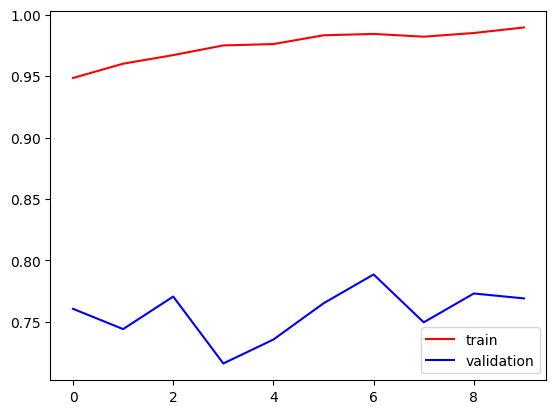

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

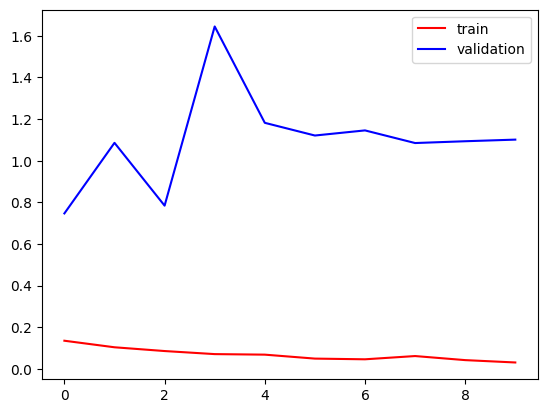

In [23]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()